In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import wave
import IPython.display as ipd
import matplotlib.pyplot as plt
import pytesseract
import textwrap

## Codificando o áudio

In [2]:
text_for_image = "testando app"
img_size = (800, 600)

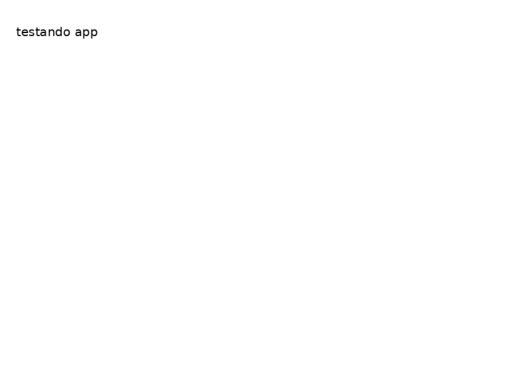

In [3]:
img = Image.new("L", img_size, color=255)  
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("DejaVuSans.ttf", 20)

lines = textwrap.wrap(text_for_image, width=40)

y_text = 25
for line in lines:
    draw.text((10, y_text), line, fill=0, font=font)
    bbox = draw.textbbox((0, 0), line, font=font)
    line_height = bbox[3] - bbox[1]
    y_text += line_height + 5

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [6]:
data = np.array(img).flatten()
data = (data / 255.0 * 32767).astype(np.int16)

sample_rate = 44100 # Hz
duration = len(data) / sample_rate

with wave.open("audio.wav", "w") as wav_file:
    wav_file.setnchannels(1)        
    wav_file.setsampwidth(2)       
    wav_file.setframerate(sample_rate)
    wav_file.writeframes(data.tobytes())

print(f"Áudio gerado: audio.wav (duração ~{duration:.2f}s)")

Áudio gerado: audio.wav (duração ~10.88s)


In [7]:
# 4. Reproduzir o áudio no notebook
ipd.Audio("audio.wav")

## Decodificando o áudio

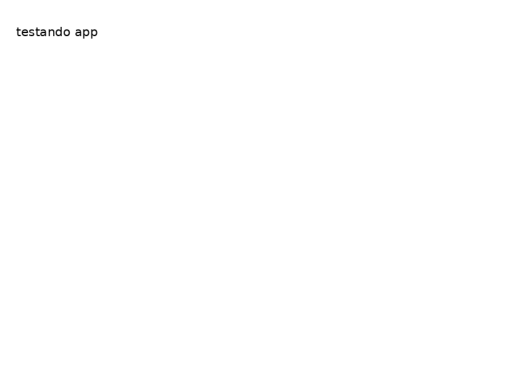

In [10]:
img_size = (800, 600) 

with wave.open("audio.wav", "rb") as wav_file:
    n_frames = wav_file.getnframes()
    audio_data = wav_file.readframes(n_frames)

data = np.frombuffer(audio_data, dtype=np.int16)

pixels = ((data.astype(np.float32) / 32767.0) * 255).astype(np.uint8)

pixels = pixels[: img_size[0] * img_size[1]]

img_array = pixels.reshape(img_size[1], img_size[0])

plt.imshow(img_array, cmap="gray")
plt.axis("off")
plt.show()

In [11]:
reconstructed_img = Image.fromarray(img_array)

texto = pytesseract.image_to_string(reconstructed_img, lang="por")  # ou "eng"
print("Texto extraído:", texto)

Texto extraído: testando app

